In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
def Counting(filenames, level):
    file_list = sorted(glob.glob(filenames))
    cat1 = [] # >98 samples
    cat2 = [] # >= 90 samples
    cat3 = [] # < 90 samples
    for i in file_list:
        file = open(i)
        #print(i)
        data = [] #the list to categorise the number of samples with AS gene/junction into three groups: > 98; >90; other 
        for line in file:
            nsamples = int(line.split()[0])
            ngenes = int(line.split()[1])
            expression = line.split()[2]
            if nsamples <= 90: data.append(['cat3', ngenes, expression])
            elif nsamples > 98: data.append(['cat1', ngenes, expression])
            else: data.append(['cat2', ngenes, expression])
        df = pd.DataFrame.from_records(data)
        df.columns=['Samples', 'Genes', 'Expression']
        df_explevel = df[df['Expression'] == level] #to filter only records concerning the specific expression level
        explevel = df_explevel.groupby(['Samples'])['Genes'].sum()
        cat1.append(explevel[0])
        cat2.append(explevel[1])
        cat3.append(explevel[2])
    return(np.array(cat1), np.array(cat2), np.array(cat3))

In [72]:
typ = 'genes' #other alternative: junctions 

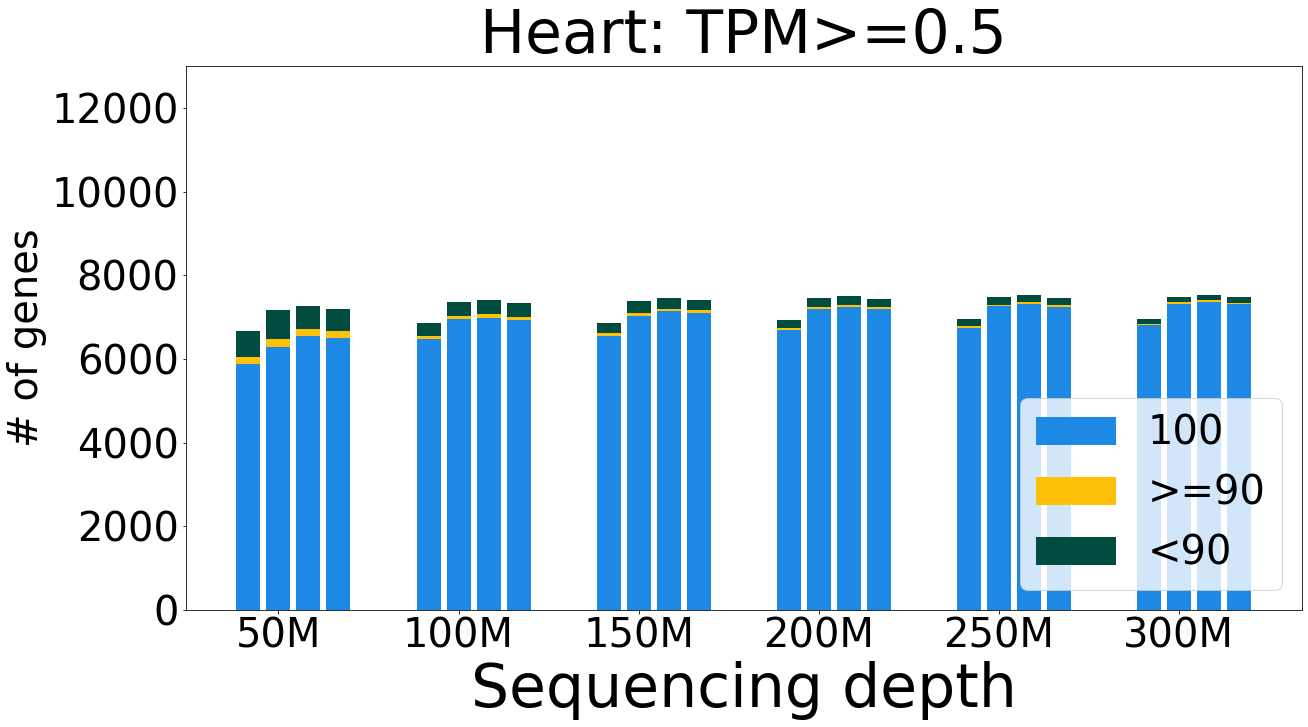

In [76]:
level = 'high'
cat1_5, cat2_5, cat3_5 = Counting('J26675_*_x_' + typ + '_in_y_samples', level)
cat1_6, cat2_6, cat3_6 = Counting('J26676_*_x_' + typ + '_in_y_samples', level)
cat1_7, cat2_7, cat3_7 = Counting('J26677_*_x_' + typ + '_in_y_samples', level)
cat1_8, cat2_8, cat3_8 = Counting('J26678_*_x_' + typ + '_in_y_samples', level)

#Visualisation
plt.figure(figsize=(20,10))
barWidth = 0.5

ind1 = np.arange(18, step=3)
ind2 = [x + barWidth for x in ind1]
ind3 = [x + barWidth for x in ind2]
ind4 = [x + barWidth for x in ind3]

p1_5 = plt.bar(ind1, cat1_5, width=barWidth-0.1, color="#1E88E5")
p2_5 = plt.bar(ind1, cat2_5, bottom=cat1_5, width=barWidth-0.1, color = '#FFC107')
p3_5 = plt.bar(ind1, cat3_5, bottom=cat2_5+cat1_5, width=barWidth-0.1, color = '#004D40')

p1_6 = plt.bar(ind2, cat1_6, width=barWidth-0.1, color="#1E88E5")
p2_6 = plt.bar(ind2, cat2_6, bottom=cat1_6, width=barWidth-0.1, color = '#FFC107')
p3_6 = plt.bar(ind2, cat3_6, bottom=cat2_6+cat1_6, width=barWidth-0.1, color = '#004D40')

p1_7 = plt.bar(ind3, cat1_7, width=barWidth-0.1, color="#1E88E5")
p2_7 = plt.bar(ind3, cat2_7, bottom=cat1_7, width=barWidth-0.1, color = '#FFC107')
p3_7 = plt.bar(ind3, cat3_7, bottom=cat2_7+cat1_7, width=barWidth-0.1, color = '#004D40')

p1_8 = plt.bar(ind4, cat1_8, width=barWidth-0.1, color="#1E88E5")
p2_8 = plt.bar(ind4, cat2_8, bottom=cat1_8, width=barWidth-0.1, color = '#FFC107')
p3_8 = plt.bar(ind4, cat3_8, bottom=cat2_8+cat1_8, width=barWidth-0.1, color = '#004D40')




plt.xticks([r + barWidth for r in [ 0, 3, 6, 9, 12, 15]], 
           ['50M', '100M', '150M', '200M', '250M', '300M'],
          fontsize=20)

plt.legend((p1_5[0], p2_5[0], p3_5[0]), ('100', '>=90', '<90'), fontsize=40, loc='lower right')
plt.yticks(fontsize=40)
plt.xticks(fontsize=40)

plt.ylabel('# of ' + typ, fontsize=40)
plt.xlabel('Sequencing depth', fontsize=60)

if typ == 'genes':
    if level == 'mid':
        plt.title('Heart: 0.1<=TPM<0.5', fontsize=60)
        plt.ylim(0, 4500)
    if level == 'low':
        plt.title('Heart: TPM<0.1', fontsize=60)
        plt.ylim(0, 7000)
    if level == 'high':
        plt.title('Heart: TPM>=0.5', fontsize=60)
        plt.ylim(0, 13000)
        
if typ == 'junctions':
    if level == 'mid':
        plt.title('Heart: 0.1<=TPM<0.5', fontsize=60)
    if level == 'low':
        plt.title('Heart: TPM<0.1', fontsize=60)
    if level == 'high':
        plt.title('Heart: TPM>=0.5', fontsize=60)
plt.show()

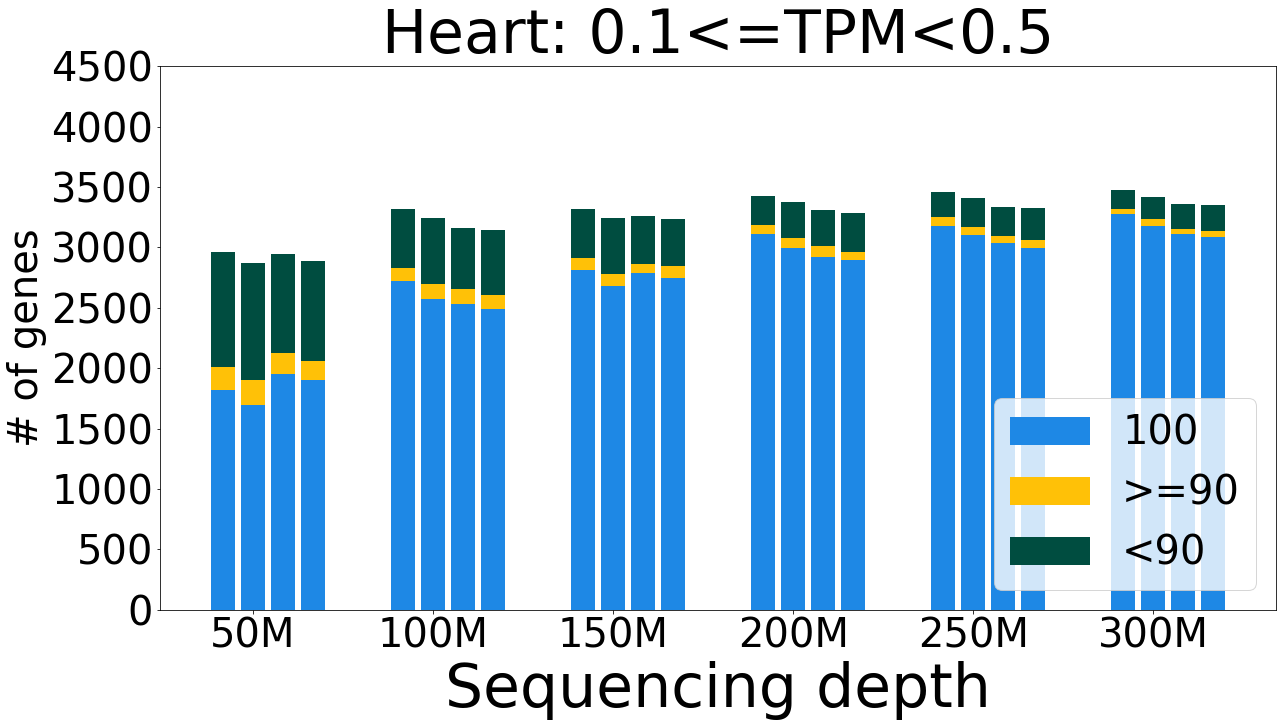

In [77]:
level = 'mid'
cat1_5, cat2_5, cat3_5 = Counting('J26675_*_x_' + typ + '_in_y_samples', level)
cat1_6, cat2_6, cat3_6 = Counting('J26676_*_x_' + typ + '_in_y_samples', level)
cat1_7, cat2_7, cat3_7 = Counting('J26677_*_x_' + typ + '_in_y_samples', level)
cat1_8, cat2_8, cat3_8 = Counting('J26678_*_x_' + typ + '_in_y_samples', level)

#Visualisation
plt.figure(figsize=(20,10))
barWidth = 0.5

ind1 = np.arange(18, step=3)
ind2 = [x + barWidth for x in ind1]
ind3 = [x + barWidth for x in ind2]
ind4 = [x + barWidth for x in ind3]

p1_5 = plt.bar(ind1, cat1_5, width=barWidth-0.1, color="#1E88E5")
p2_5 = plt.bar(ind1, cat2_5, bottom=cat1_5, width=barWidth-0.1, color = '#FFC107')
p3_5 = plt.bar(ind1, cat3_5, bottom=cat2_5+cat1_5, width=barWidth-0.1, color = '#004D40')

p1_6 = plt.bar(ind2, cat1_6, width=barWidth-0.1, color="#1E88E5")
p2_6 = plt.bar(ind2, cat2_6, bottom=cat1_6, width=barWidth-0.1, color = '#FFC107')
p3_6 = plt.bar(ind2, cat3_6, bottom=cat2_6+cat1_6, width=barWidth-0.1, color = '#004D40')

p1_7 = plt.bar(ind3, cat1_7, width=barWidth-0.1, color="#1E88E5")
p2_7 = plt.bar(ind3, cat2_7, bottom=cat1_7, width=barWidth-0.1, color = '#FFC107')
p3_7 = plt.bar(ind3, cat3_7, bottom=cat2_7+cat1_7, width=barWidth-0.1, color = '#004D40')

p1_8 = plt.bar(ind4, cat1_8, width=barWidth-0.1, color="#1E88E5")
p2_8 = plt.bar(ind4, cat2_8, bottom=cat1_8, width=barWidth-0.1, color = '#FFC107')
p3_8 = plt.bar(ind4, cat3_8, bottom=cat2_8+cat1_8, width=barWidth-0.1, color = '#004D40')




plt.xticks([r + barWidth for r in [ 0, 3, 6, 9, 12, 15]], 
           ['50M', '100M', '150M', '200M', '250M', '300M'],
          fontsize=20)

plt.legend((p1_5[0], p2_5[0], p3_5[0]), ('100', '>=90', '<90'), fontsize=40, loc='lower right')
plt.yticks(fontsize=40)
plt.xticks(fontsize=40)

plt.ylabel('# of ' + typ, fontsize=40)
plt.xlabel('Sequencing depth', fontsize=60)

if typ == 'genes':
    if level == 'mid':
        plt.title('Heart: 0.1<=TPM<0.5', fontsize=60)
        plt.ylim(0, 4500)
    if level == 'low':
        plt.title('Heart: TPM<0.1', fontsize=60)
        plt.ylim(0, 7000)
    if level == 'high':
        plt.title('Heart: TPM>=0.5', fontsize=60)
        plt.ylim(0, 13000)
        
if typ == 'junctions':
    if level == 'mid':
        plt.title('Heart: 0.1<=TPM<0.5', fontsize=60)
    if level == 'low':
        plt.title('Heart: TPM<0.1', fontsize=60)
    if level == 'high':
        plt.title('Heart: TPM>=0.5', fontsize=60)
plt.show()

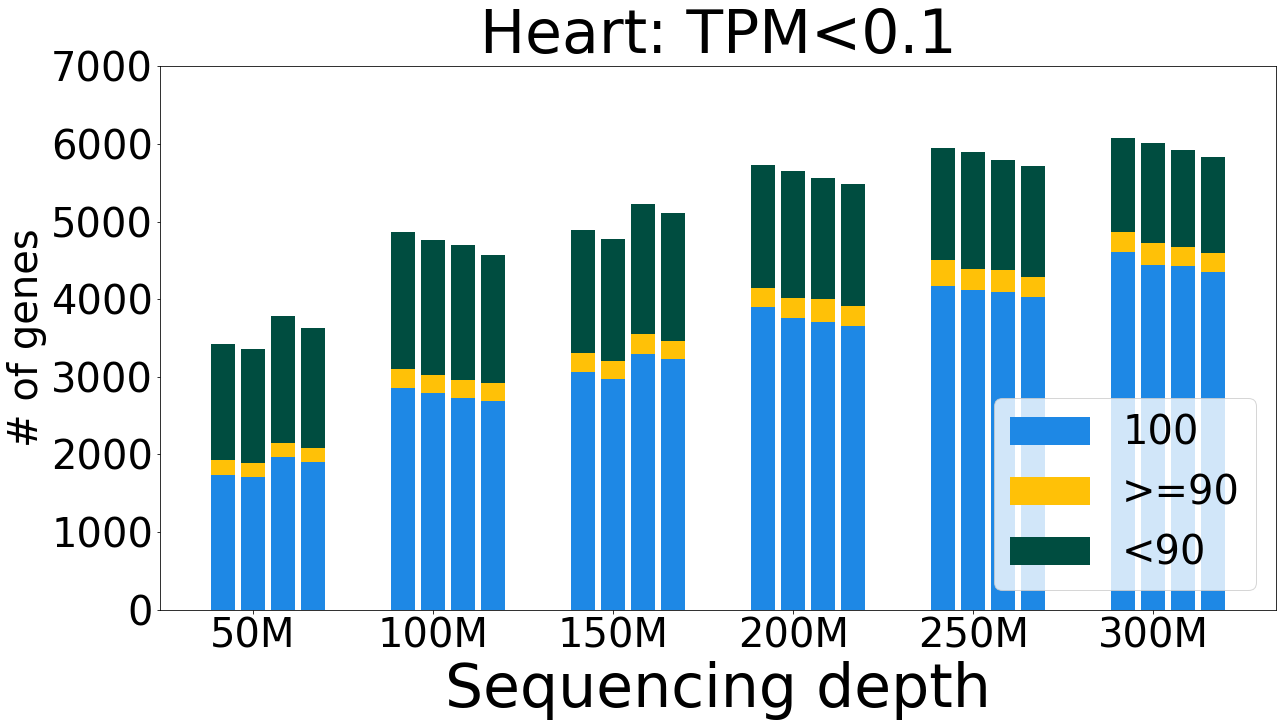

In [78]:
level = 'low'
cat1_5, cat2_5, cat3_5 = Counting('J26675_*_x_' + typ + '_in_y_samples', level)
cat1_6, cat2_6, cat3_6 = Counting('J26676_*_x_' + typ + '_in_y_samples', level)
cat1_7, cat2_7, cat3_7 = Counting('J26677_*_x_' + typ + '_in_y_samples', level)
cat1_8, cat2_8, cat3_8 = Counting('J26678_*_x_' + typ + '_in_y_samples', level)

#Visualisation
plt.figure(figsize=(20,10))
barWidth = 0.5

ind1 = np.arange(18, step=3)
ind2 = [x + barWidth for x in ind1]
ind3 = [x + barWidth for x in ind2]
ind4 = [x + barWidth for x in ind3]

p1_5 = plt.bar(ind1, cat1_5, width=barWidth-0.1, color="#1E88E5")
p2_5 = plt.bar(ind1, cat2_5, bottom=cat1_5, width=barWidth-0.1, color = '#FFC107')
p3_5 = plt.bar(ind1, cat3_5, bottom=cat2_5+cat1_5, width=barWidth-0.1, color = '#004D40')

p1_6 = plt.bar(ind2, cat1_6, width=barWidth-0.1, color="#1E88E5")
p2_6 = plt.bar(ind2, cat2_6, bottom=cat1_6, width=barWidth-0.1, color = '#FFC107')
p3_6 = plt.bar(ind2, cat3_6, bottom=cat2_6+cat1_6, width=barWidth-0.1, color = '#004D40')

p1_7 = plt.bar(ind3, cat1_7, width=barWidth-0.1, color="#1E88E5")
p2_7 = plt.bar(ind3, cat2_7, bottom=cat1_7, width=barWidth-0.1, color = '#FFC107')
p3_7 = plt.bar(ind3, cat3_7, bottom=cat2_7+cat1_7, width=barWidth-0.1, color = '#004D40')

p1_8 = plt.bar(ind4, cat1_8, width=barWidth-0.1, color="#1E88E5")
p2_8 = plt.bar(ind4, cat2_8, bottom=cat1_8, width=barWidth-0.1, color = '#FFC107')
p3_8 = plt.bar(ind4, cat3_8, bottom=cat2_8+cat1_8, width=barWidth-0.1, color = '#004D40')




plt.xticks([r + barWidth for r in [ 0, 3, 6, 9, 12, 15]], 
           ['50M', '100M', '150M', '200M', '250M', '300M'],
          fontsize=20)

plt.legend((p1_5[0], p2_5[0], p3_5[0]), ('100', '>=90', '<90'), fontsize=40, loc='lower right')
plt.yticks(fontsize=40)
plt.xticks(fontsize=40)

plt.ylabel('# of ' + typ, fontsize=40)
plt.xlabel('Sequencing depth', fontsize=60)

if typ == 'genes':
    if level == 'mid':
        plt.title('Heart: 0.1<=TPM<0.5', fontsize=60)
        plt.ylim(0, 4500)
    if level == 'low':
        plt.title('Heart: TPM<0.1', fontsize=60)
        plt.ylim(0, 7000)
    if level == 'high':
        plt.title('Heart: TPM>=0.5', fontsize=60)
        plt.ylim(0, 13000)
        
if typ == 'junctions':
    if level == 'mid':
        plt.title('Heart: 0.1<=TPM<0.5', fontsize=60)
    if level == 'low':
        plt.title('Heart: TPM<0.1', fontsize=60)
    if level == 'high':
        plt.title('Heart: TPM>=0.5', fontsize=60)
plt.show()